# Red wine quality - PersonalML project2

## Import the necessary liabraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the csv dataset into pandas data frame

In [2]:
redWineQuality_df = pd.read_csv(r'C:\Users\itumeleng\Desktop\Python Programs\wine+quality\winequality-red.csv')

## Exploratory Analysis: Inspect the dataset

### View number of rows and columns

In [3]:
print(f'The red wine quality dataset contains {redWineQuality_df.shape[0]} Observations and {redWineQuality_df.shape[1]} Attributes')

The red wine quality dataset contains 1599 Observations and 12 Attributes


### View the first five rows

In [4]:
redWineQuality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### View the last five rows

In [5]:
redWineQuality_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### View descriptive statistics

In [6]:
redWineQuality_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### View data types of all columns

In [7]:
redWineQuality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Check the number of null rows each columns

In [8]:
emptyRows = redWineQuality_df.isna().sum()
print(f'Here is the number of empty rows in each column:\n{emptyRows}')

Here is the number of empty rows in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Visualize the data

### Visualize the quality distribution 

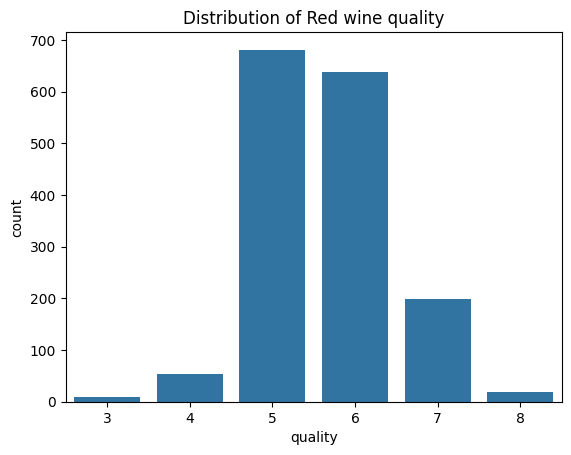

In [9]:
sns.countplot(x='quality',data=redWineQuality_df)
plt.title('Distribution of Red wine quality')
plt.show()

### Check for correlation

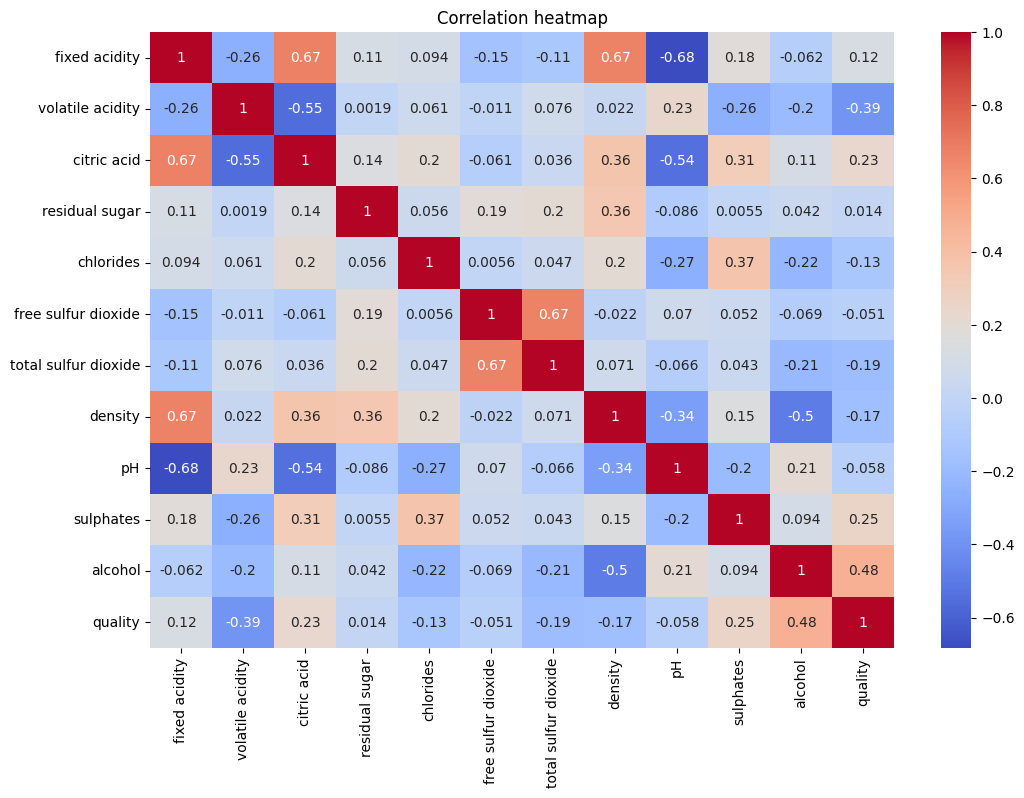

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(redWineQuality_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

### Visualize how selected features affect quality using pairplot 

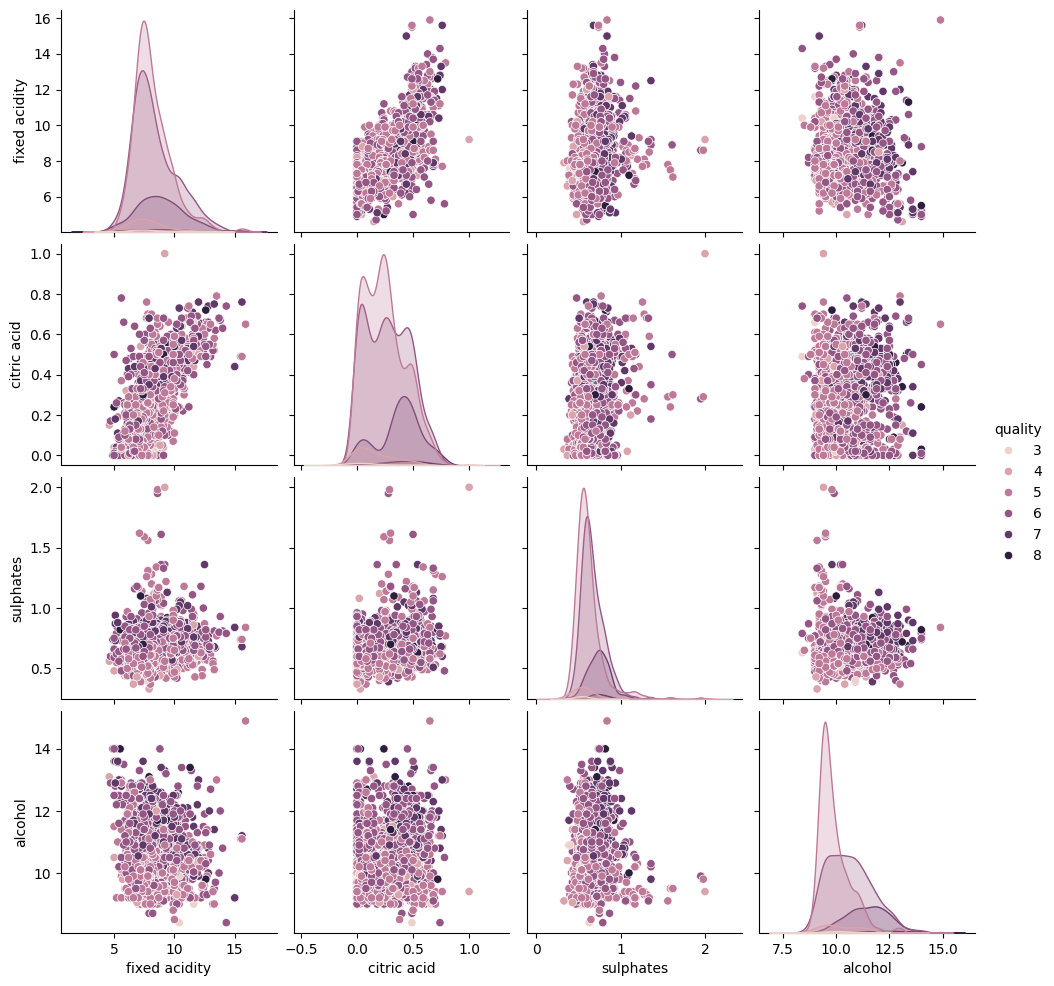

In [13]:
sns.pairplot(redWineQuality_df[['fixed acidity','citric acid','sulphates','alcohol','quality']],hue='quality')
plt.show()

## Preprocess the data

### Split the data into independent (X) and dependent (y) variables

In [380]:
X = redWineQuality_df.drop('quality',axis=1)

In [381]:
y = redWineQuality_df['quality']

### Scale features

In [382]:
scaler = StandardScaler()

In [383]:
X_scaled = scaler.fit_transform(X)

### Split the data into train and test sets for both target and feature variables

In [384]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.24,random_state=42)

## Model implementation

### Initialize the ML model

In [385]:
model = LinearRegression()

### Train the model

In [386]:
model.fit(X_train,y_train)

LinearRegression()

### Use trained model to make predictions on unseen test data

In [387]:
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    y_pred[i] = int(round(y_pred[i]))

### Evaluate the model

### Check the model's accuracy

In [388]:
accuracy = accuracy_score(y_pred,y_test) * 100
print(f'This model has an accuracy of: {round(accuracy,2)} %')

This model has an accuracy of: 59 %


### Check the classification report

In [389]:
classRep = classification_report(y_pred,y_test)
classRep

c:\Users\itumeleng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\itumeleng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\itumeleng\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

'              precision    recall  f1-score   support\n\n         3.0       0.00      0.00      0.00         0\n         4.0       0.00      0.00      0.00         0\n         5.0       0.69      0.65      0.67       167\n         6.0       0.67      0.55      0.60       197\n         7.0       0.20      0.45      0.28        20\n         8.0       0.00      0.00      0.00         0\n\n    accuracy                           0.59       384\n   macro avg       0.26      0.28      0.26       384\nweighted avg       0.65      0.59      0.61       384\n'

### View confusion Matrix

In [390]:
confusionMatrix = confusion_matrix(y_pred,y_test)

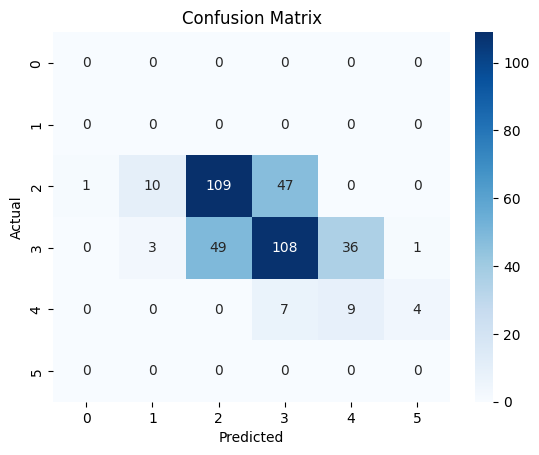

In [391]:

sns.heatmap(confusionMatrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()